In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Lets load the etch_california_housing


In [ ]:
from sklearn.datasets import fetch_california_housing

# تحميل بيانات كاليفورنيا للإسكان (بديل حديث وأكثر ملاءمة)
data = fetch_california_housing()
df=pd.DataFrame(data)


In [ ]:
df=pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target

In [ ]:

	MedInc	HouseAge	AveRooms	AveBedrms	Population	AveOccup	Latitude	Longitude
 8.3252	41.0	6.984127	1.023810	322.0	2.555556	37.88	-122.23	4.526
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:

df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

# Analyzing The Correlated Features


In [14]:
### EDA
## Correlation
#الارتباط بين السمات وبعضها ومعرفة هل السمات توثر علي بعضها 
df.corr()
dataset=df

Text(0, 0.5, 'Price')

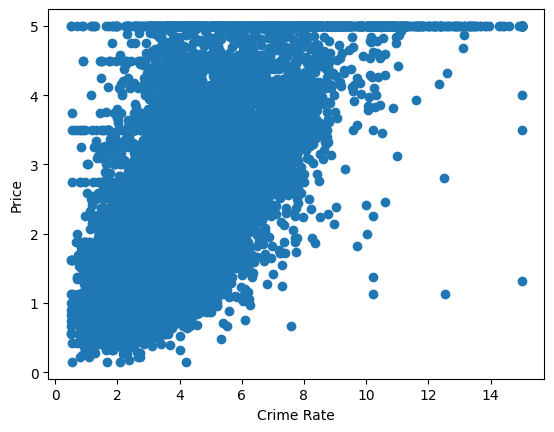

In [18]:
plt.scatter(dataset['MedInc'],dataset['target'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

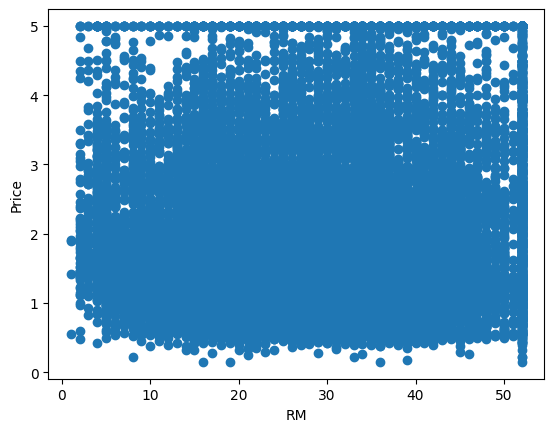

In [19]:
plt.scatter(dataset['HouseAge'],dataset['target'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='AveBedrms', ylabel='target'>

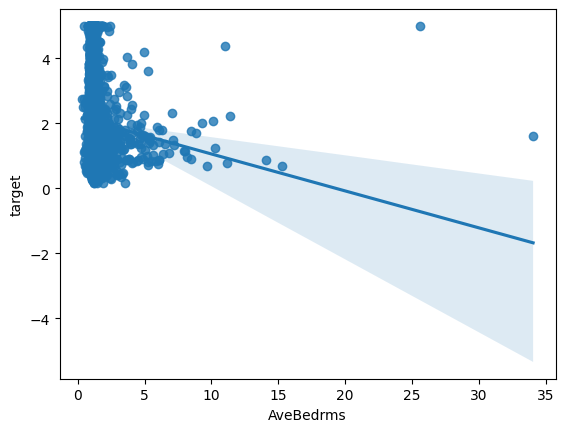

In [20]:
import seaborn as sns
sns.regplot(x="AveBedrms",y="target",data=dataset)

# preparing dataset

In [23]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [25]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [27]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [28]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

# Model Training



In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [32]:
## print the coefficients and the intercept
print(regression.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [33]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [38]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [39]:
reg_pred


array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133], shape=(6192,))

# Assumptions


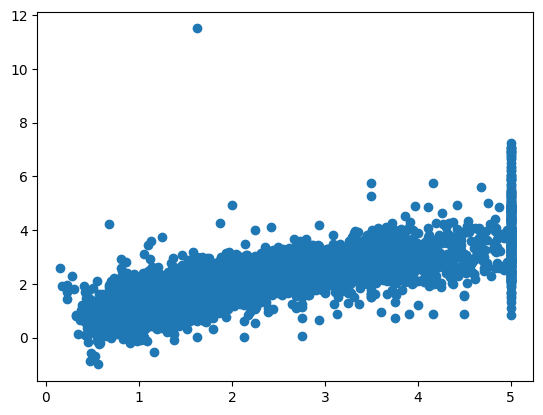

In [40]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [41]:
## Residuals
residuals=y_test-reg_pred

In [42]:
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: target, Length: 6192, dtype: float64

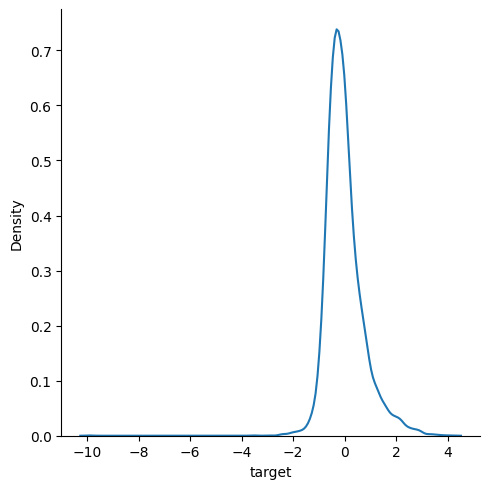

In [43]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

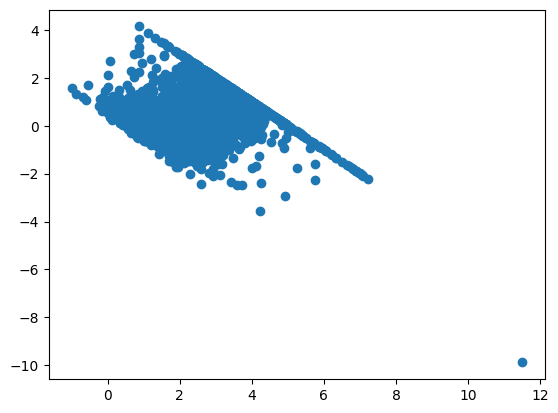

In [44]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

# eval

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5272474538305952
0.5305677824766752
0.7284008391515452


# R square and adjusted R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares


In [47]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5957702326061665


# New Data Prediction


In [61]:
t=X_train[0].reshape(1,-1)

In [62]:
##transformation of new data
scaler.transform(t)

c:\Users\H\anaconda3\envs\Linear_Regression_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ -1.96519413,  -2.22513103,  -2.14269327,  -3.06577985,
         -1.25252527,  -0.25297092, -17.07023123,  60.09655319]])

In [64]:
regression.predict(scaler.transform(t))


c:\Users\H\anaconda3\envs\Linear_Regression_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-37.22855309])

# Pickling The Model file For Deployment


In [65]:
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [69]:
## Prediction
pickled_model.predict(scaler.transform(t))

c:\Users\H\anaconda3\envs\Linear_Regression_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-37.22855309])